In [4]:
# Data pre-processing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Data visualization
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
%matplotlib inline

In [5]:
#Reading a text file and storing it into a dataframe.
CovidVariant = pd.read_csv(r'C:\Users\dixad\Documents\covid_data-analysis\Data\covid-variants.csv')
Delta = CovidVariant.loc[CovidVariant['variant'] == 'Delta']
Delta = Delta.loc[Delta["location"].isin(["India", "United Kingdom", "Germany"])]

INDDelta = Delta.loc[Delta['location'] == 'India']
UKDelta = Delta.loc[Delta['location'] == 'United Kingdom']
GermanyDelta = Delta.loc[Delta['location'] == 'Germany']

In [26]:
INDDelta.head(5)

,location,date,perc_sequences
0,India,2020-05-11,0.0
1,India,2020-05-25,0.0
2,India,2020-06-08,0.0
3,India,2020-06-22,0.0
4,India,2020-07-06,0.0


In [28]:
UKDelta.head(5)

,location,date,perc_sequences
0,United Kingdom,2020-05-11,0.0
1,United Kingdom,2020-05-25,0.0
2,United Kingdom,2020-06-08,0.0
3,United Kingdom,2020-06-22,0.0
4,United Kingdom,2020-07-06,0.0


In [34]:
GermanyDelta.head(5)

,location,date,perc_sequences
0,Germany,2020-05-11,0.0
1,Germany,2020-05-25,0.0
2,Germany,2020-06-08,0.0
3,Germany,2020-06-22,0.0
4,Germany,2020-07-06,0.0


In [36]:
INDDelta.reset_index(inplace = True)
UKDelta.reset_index(inplace = True)
GermanyDelta.reset_index(inplace = True)

In [38]:
INDDelta = INDDelta[['location','date','perc_sequences']]
UKDelta = UKDelta[['location','date','perc_sequences']]
GermanyDelta = GermanyDelta[['location','date','perc_sequences']]

In [40]:
INDDelta['date'] = pd.to_datetime(INDDelta['date']) 
UKDelta['date'] = pd.to_datetime(UKDelta['date'])  
GermanyDelta['date'] = pd.to_datetime(GermanyDelta['date'])
GermanyDelta.tail()

,location,date,perc_sequences
26,Germany,2021-05-03,0.69
27,Germany,2021-05-17,1.96
28,Germany,2021-05-31,3.86
29,Germany,2021-06-14,12.68
30,Germany,2021-06-28,40.61


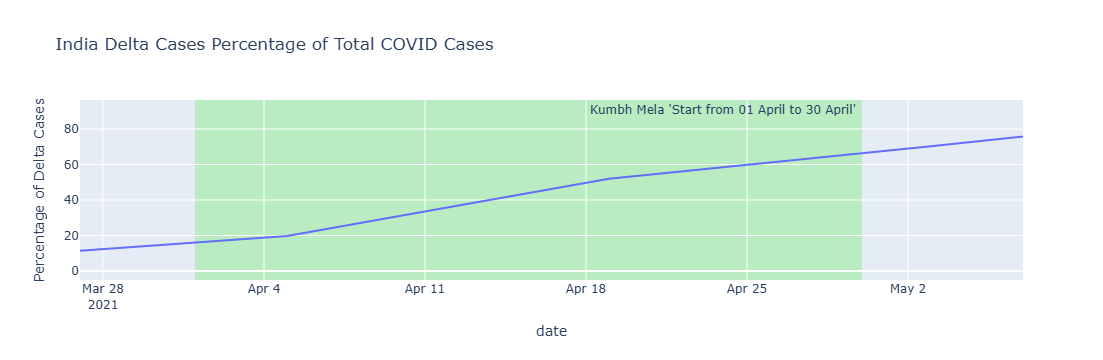

In [42]:
fig = px.line(INDDelta, x='date', y='perc_sequences', 
              labels={
                     "perc_sequences": "Percentage of Delta Cases",
                 },
              title='India Delta Cases Percentage of Total COVID Cases'
              ,range_x=['2021-03-27','2021-05-07'])
# summer holiday taken between 3 June and 14 September 2020. Length and exact dates will differ depending on age group


fig.add_vrect(
    x0="2021-04-01", x1="2021-04-30",annotation_text="Kumbh Mela 'Start from 01 April to 30 April' ",
    fillcolor="LightGreen", opacity=0.5,
    layer="below", line_width=0,
)
fig.show()

In [53]:
confirmedCases = Delta.loc[Delta["location"].isin(["India", "United Kingdom", "Germany"])]
confirmedCases.tail()


,location,date,variant,num_sequences,perc_sequences,num_sequences_total
45437,United Kingdom,2021-05-03,Delta,1289.0,9.09,14181
45460,United Kingdom,2021-05-17,Delta,4816.0,33.69,14297
45483,United Kingdom,2021-05-31,Delta,17429.0,73.29,23781
45506,United Kingdom,2021-06-14,Delta,33402.0,90.46,36925
45529,United Kingdom,2021-06-28,Delta,32876.0,98.01,33542


In [57]:
print(confirmedCases.columns)


Index(['location', 'date', 'variant', 'num_sequences', 'perc_sequences',
       'num_sequences_total'],
      dtype='object')


In [59]:
confirmedCases['Daily Cases'] = confirmedCases['num_sequences'].diff()
confirmedCases = confirmedCases[confirmedCases['Daily Cases'] > 0]
confirmedCases.dropna(inplace=True)
confirmedCases.tail()


,location,date,variant,num_sequences,perc_sequences,num_sequences_total,Daily Cases
45414,United Kingdom,2021-04-19,Delta,238.0,1.52,15667,212.0
45437,United Kingdom,2021-05-03,Delta,1289.0,9.09,14181,1051.0
45460,United Kingdom,2021-05-17,Delta,4816.0,33.69,14297,3527.0
45483,United Kingdom,2021-05-31,Delta,17429.0,73.29,23781,12613.0
45506,United Kingdom,2021-06-14,Delta,33402.0,90.46,36925,15973.0


In [65]:
India = confirmedCases.loc[confirmedCases['location'] == 'India']
UK = confirmedCases.loc[confirmedCases['location'] == 'United Kingdom']
Germany = confirmedCases.loc[confirmedCases['location'] == 'Germany']

In [69]:
India['date'] = pd.to_datetime(India['date']) 
UK['date'] = pd.to_datetime(UK['date'])  
Germany['date'] = pd.to_datetime(Germany['date'])
India.tail()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total,Daily Cases
18021,India,2021-03-08,Delta,59.0,3.01,1961,48.0
18044,India,2021-03-22,Delta,188.0,6.69,2810,129.0
18067,India,2021-04-05,Delta,648.0,19.74,3283,460.0
18090,India,2021-04-19,Delta,1920.0,51.96,3695,1272.0
18113,India,2021-05-03,Delta,2231.0,70.31,3173,311.0


In [71]:
India.reset_index(inplace = True)
UK.reset_index(inplace = True)
Germany.reset_index(inplace = True)

In [77]:
India = India[['location','date','Daily Cases']]
UK = UK[['location','date','Daily Cases']]
Germany = Germany[['location','date','Daily Cases']]
UK.tail()

,location,date,Daily Cases
3,United Kingdom,2021-04-19,212.0
4,United Kingdom,2021-05-03,1051.0
5,United Kingdom,2021-05-17,3527.0
6,United Kingdom,2021-05-31,12613.0
7,United Kingdom,2021-06-14,15973.0


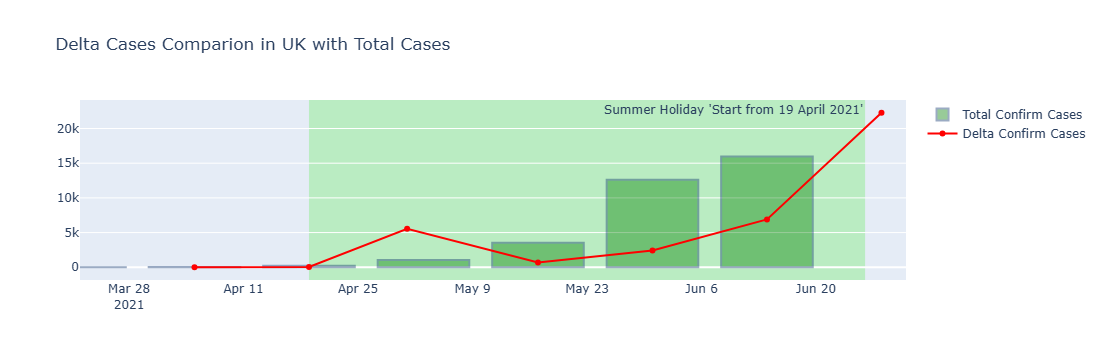

In [79]:
date = ['2021-04-05','2021-04-19', '2021-05-01', '2021-05-17', '2021-05-31', '2021-06-14', '2021-06-28']
perc = [1, 47, 5553, 674, 2415, 6894, 22271]
# set up plotly figure
fig = make_subplots(1,1)

# add first bar trace at row = 1, col = 1
fig.add_trace(go.Bar(x=UK['date'], y=UK['Daily Cases'],
                     name='Total Confirm Cases',
                     marker_color = 'green',
                     opacity=0.4,
                     marker_line_color='rgb(8,48,107)',
                     marker_line_width=2))
fig.update_xaxes(range=['2021-03-22','2021-07-01'])

fig.update_layout(title='Delta Cases Comparion in UK with Total Cases')

fig.add_vrect(
    x0="2021-04-19", x1="2021-06-26",annotation_text="Summer Holiday 'Start from 19 April 2021'",
    fillcolor="LightGreen", opacity=0.5,
    layer="below", line_width=0
)
# add first scatter trace at row = 1, col = 1
fig.add_trace(go.Scatter(x=date, y=perc, line=dict(color='red'), name='Delta Confirm Cases'),
              row = 1, col = 1)

fig.show()

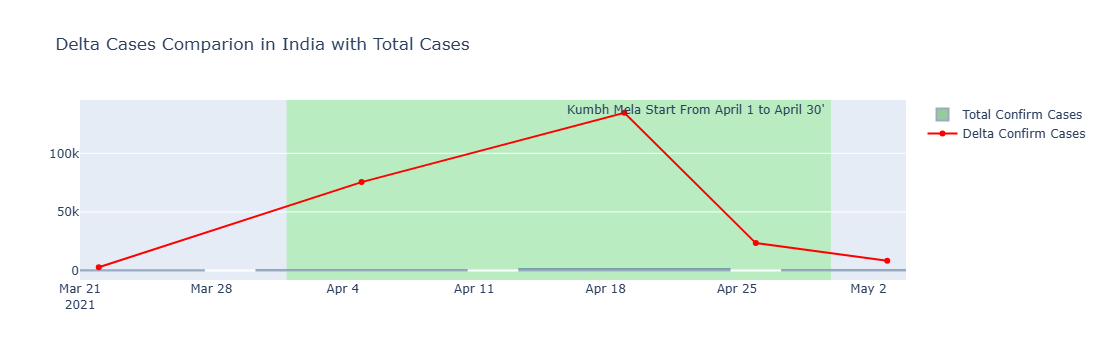

In [83]:
from plotly.subplots import make_subplots
date = ['2021-03-22','2021-04-05', '2021-04-19', '2021-04-26', '2021-05-03']
perc = [2727, 75436, 134664, 23355, 8223]
# set up plotly figure
fig = make_subplots(1,1)

# add first bar trace at row = 1, col = 1
fig.add_trace(go.Bar(x=India['date'], y=India['Daily Cases'],
                     name='Total Confirm Cases',
                     marker_color = 'green',
                     opacity=0.4,
                     marker_line_color='rgb(8,48,107)',
                     marker_line_width=2))

fig.update_xaxes(range=['2021-03-21','2021-05-04'])

fig.update_layout(title='Delta Cases Comparion in India with Total Cases')

fig.add_vrect(
    x0="2021-04-01", x1="2021-04-30",annotation_text="Kumbh Mela Start From April 1 to April 30' ",
    fillcolor="LightGreen", opacity=0.5,
    layer="below", line_width=0
)
# add first scatter trace at row = 1, col = 1
fig.add_trace(go.Scatter(x=date, y=perc, line=dict(color='red'), name='Delta Confirm Cases'),
              row = 1, col = 1)

fig.show()

In [19]:
indiadata = pd.read_csv(r'C:\Users\dixad\Documents\covid_data-analysis\Data\covid_19_india.csv')
indiadata.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818
16849,16850,2021-07-07,8:00 AM,West Bengal,-,-,1472132,17834,1507241


In [21]:
indiadata.rename(columns={'State/UnionTerritory': 'State'}, inplace=True)
df_MR = indiadata[indiadata.State == 'Maharashtra']
df_MR.tail()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
16690,16691,2021-07-03,8:00 AM,Maharashtra,-,-,5836920,122353,6079352
16726,16727,2021-07-04,8:00 AM,Maharashtra,-,-,5845315,122724,6088841
16762,16763,2021-07-05,8:00 AM,Maharashtra,-,-,5848693,123030,6098177
16798,16799,2021-07-06,8:00 AM,Maharashtra,-,-,5861720,123136,6104917
16834,16835,2021-07-07,8:00 AM,Maharashtra,-,-,5872268,123531,6113335


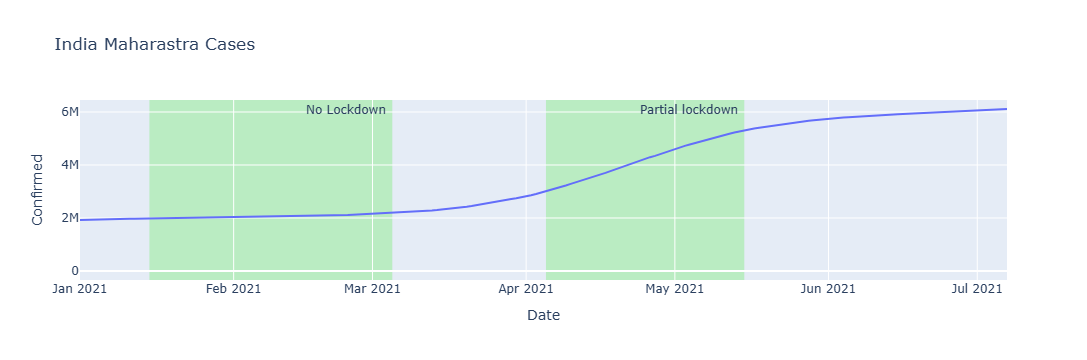

In [23]:
fig = px.line(df_MR, x='Date', y='Confirmed', range_x=['2021-01-01','2021-07-07'], title="India Maharastra Cases")
fig.add_vrect(
    x0="2021-01-15", x1="2021-03-05",annotation_text="No Lockdown ",
    fillcolor="LightGreen", opacity=0.5,
    layer="below", line_width=0,
)
fig.add_vrect(
    x0="2021-04-05",x1="2021-05-15",annotation_text="Partial lockdown ",
    fillcolor="LightGreen", opacity=0.5,
    layer="below", line_width=0,
)

fig.show()